Javier Arturo Rozo Alzate - jarozoa@eafit.edu.co  
Johan Steward Rios Naranjo - jriosna1@eafit.edu.co    
Liceth Cristina Mosquera Galvis - lcmosquerg@eafit.edu.co  
Juan Mauricio Cuscagua Lopez - jcuscagu@eafit.edu.co  
Juan Diego Estrada Perez - jestra15@eafit.edu.co

Programa: Aprendizaje Automático
Docente: Olga Lucia Quintero - oquinte1@eafit.edu.co  
05 de noviembre de 2019<br>

Basado en: https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html

In [1]:
# Import libraries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd

# Data preparation
from sklearn.preprocessing import StandardScaler

# Codiging - no warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

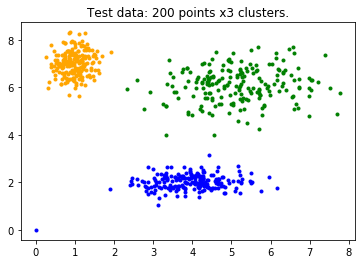

In [3]:
# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

Above is our test data. We see three distinct blobs. However, what would happen if we didn’t know how many clusters we should expect? Perhaps if the data were not so clearly clustered?

Let’s try clustering our data several times, with between 2 and 9 clusters.

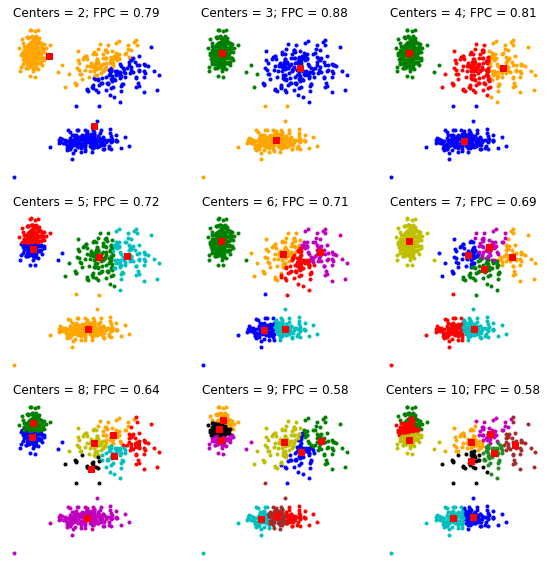

In [4]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

### The fuzzy partition coefficient (FPC)

The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric which tells us how cleanly our data is described by a certain model. Next we will cluster our set of data - which we know has three clusters - several times, with between 2 and 9 clusters. We will then show the results of the clustering, and plot the fuzzy partition coefficient. When the FPC is maximized, our data is described best.

Text(0, 0.5, 'Fuzzy partition coefficient')

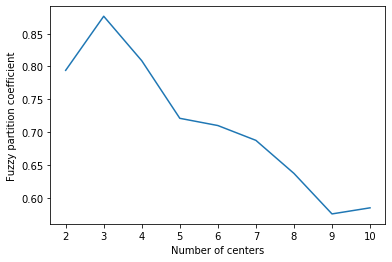

In [5]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

## Classifying New Data

### Building the model

We know our best model has three cluster centers. We'll rebuild a 3-cluster model for use in prediction, generate new uniform data, and predict which cluster to which each new data point belongs.

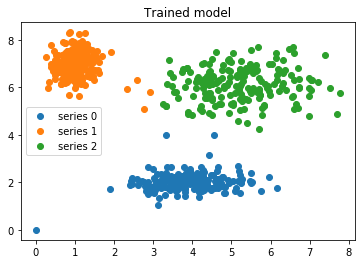

In [6]:
# Regenerate fuzzy model with 3 cluster centers - note that center ordering
# is random in this clustering algorithm, so the centers may change places
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000)

# Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

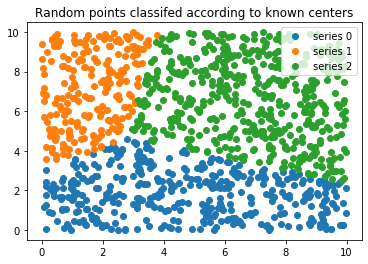

In [7]:
# Generate uniformly sampled data spread across the range [0, 10] in x and y
newdata = np.random.uniform(0, 1, (1100, 2)) * 10

# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata.T, cntr, 2, error=0.005, maxiter=1000)

# Plot the classified uniform data. Note for visualization the maximum
# membership value has been taken at each point (i.e. these are hardened,
# not fuzzy results visualized) but the full fuzzy result is the output
# from cmeans_predict.
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization

fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(3):
    ax3.plot(newdata[cluster_membership == j, 0],
             newdata[cluster_membership == j, 1], 'o',
             label='series ' + str(j))
ax3.legend()

plt.show()

## IRIS

In [13]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

iris=pd.read_csv(url,header=None)

X2 = iris.iloc[:, [0,1,2,3]] 
y2=iris.iloc[:,4]

y2.columns={'label'}

y2[y2=='Iris-setosa']=1
y2[y2=='Iris-versicolor']=2
y2[y2=='Iris-virginica']=3

#Estandarizar
sc2=StandardScaler() 
sc2.fit(X2)
X2_std=sc2.transform(X2)

alldata = np.vstack((X2_std[:,0], X2_std[:,1],X2_std[:,2],X2_std[:,3]))



Encontremos el numero de clusters adecuado utilizando el coeficiente FPC (The fuzzy partition coefficient)


In [16]:
fpcs = []
for ncenters in range(1, 10):
    cntr_model, u_model, u0_model, d_model, jm_model, p_model, fpc_model = fuzz.cluster.cmeans(alldata, 
    ncenters, 2, error=0.005, maxiter=1000, init=None)


    # Store fpc values for later
    fpcs.append(fpc_model)


Text(0, 0.5, 'Fuzzy partition coefficient')

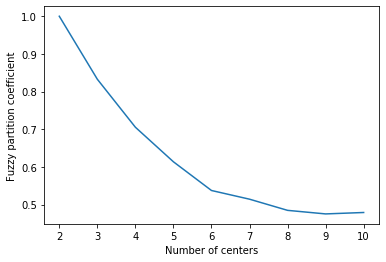

In [17]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

Según la anterior gráfica se logra observar que los posible clusters para un buen modelo seria cuando k = 3, 5 o 9.

Text(0, 0.5, 'Sepal Width')

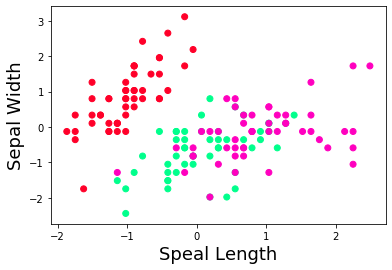

In [18]:
plt.scatter(X2_std[:,0], X2_std[:,1], c=y2, cmap='gist_rainbow')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)


## Creemos nuestro modelo con 3 clusters

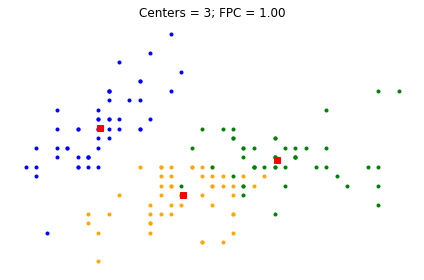

In [19]:
alldata = np.vstack((X2_std[:,0], X2_std[:,1],X2_std[:,2],X2_std[:,3]))

cntr_model, u_model, u0_model, d_model, jm_model, p_model, fpc_model = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000, init=None)

cluster_membership_iris = np.argmax(u_model, axis = 0)

fig1, ax = plt.subplots()

## X2_std[:,0], X2_std[:,1]

for j in range(3):
    ax.plot(X2_std[:,0][cluster_membership_iris == j],
            X2_std[:,1][cluster_membership_iris == j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr_model:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(3, fpc))
ax.axis('off')

fig1.tight_layout()

## Vamos a predecir en que cluster deben estar los datos de validación